<a href="https://colab.research.google.com/github/andrewkallai/MLTSA25_AKallai/blob/main/labs/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/consumptionUS.csv'
df = pd.read_csv(url)

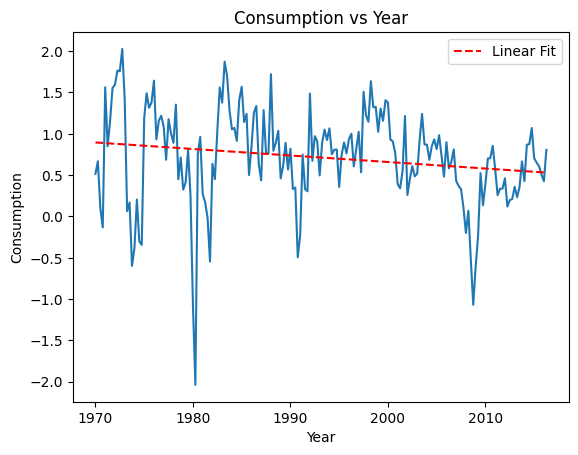

In [ ]:
df.describe()

# Assuming 'year' and 'consumption' are column names in your dataframe
plt.plot(df['year'], df['consumption'], linestyle='-')
plt.title('Consumption vs Year')
plt.xlabel('Year')
plt.ylabel('Consumption')

# Fit a line using NumPy's polyfit
coefficients = np.polyfit(df['year'], df['consumption'], 1)  # 1 for linear fit
line_equation = np.poly1d(coefficients)  # Create a polynomial function
plt.plot(df['year'], line_equation(df['year']), color='red', linestyle='--', label='Linear Fit')

plt.legend()  # Show legend for the fit line
plt.show()

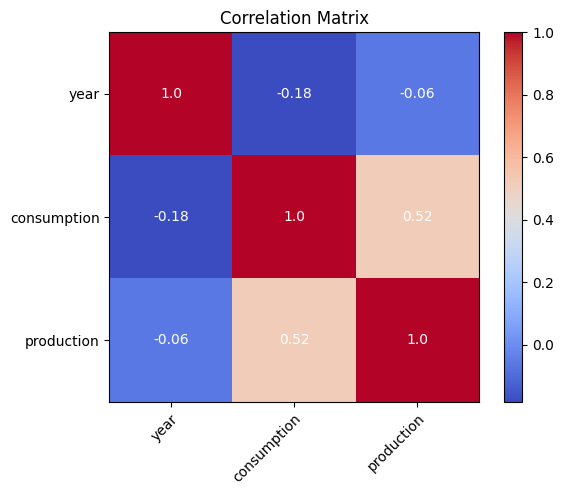

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataframe named 'df' with columns 'year', 'consumption', and 'production'
# If not, load your data accordingly

# Select the columns you want to include in the correlation plot
columns = ['year', 'consumption', 'production']
data = df[columns]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Display the correlation matrix as an image
im = ax.imshow(correlation_matrix, cmap='coolwarm')

# Set the tick labels and positions
ax.set_xticks(np.arange(len(columns)))
ax.set_yticks(np.arange(len(columns)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

# Rotate the x-axis tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add the correlation values as text annotations
for i in range(len(columns)):
    for j in range(len(columns)):
        text = ax.text(j, i, round(correlation_matrix.iloc[i, j], 2),
                       ha="center", va="center", color="w")

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title of the plot
ax.set_title("Correlation Matrix")

# Show the plot
plt.show()

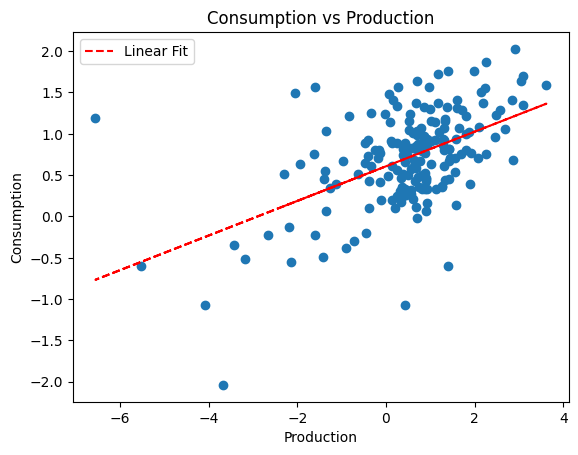

In [ ]:

# Assuming you have a dataframe named 'df' with columns 'production' and 'consumption'
# If not, load your data accordingly

# Create the scatter plot
plt.scatter(df['production'], df['consumption'])
plt.title('Consumption vs Production')
plt.xlabel('Production')
plt.ylabel('Consumption')

# Fit a line using NumPy's polyfit
coefficients = np.polyfit(df['production'], df['consumption'], 1)  # 1 for linear fit
line_equation = np.poly1d(coefficients)  # Create a polynomial function
plt.plot(df['production'], line_equation(df['production']), color='red', linestyle='--', label='Linear Fit')

plt.legend()  # Show legend for the fit line
plt.show()


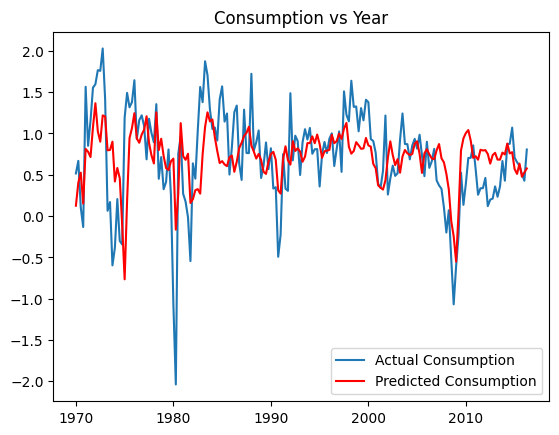

In [ ]:

# Assuming you have a dataframe named 'df' with columns 'year', 'consumption', and 'production'
# If not, load your data accordingly

# Fit a line using NumPy's polyfit
coefficients = np.polyfit(df['production'], df['consumption'], 1)  # 1 for linear fit
line_equation = np.poly1d(coefficients)  # Create a polynomial function

# Calculate predicted consumption values
predicted_consumption = line_equation(df['production'])

# Create the time series plot
plt.plot(df['year'], df['consumption'], linestyle='-', label='Actual Consumption')
plt.plot(df['year'], predicted_consumption, linestyle='-', color='red', label='Predicted Consumption')

plt.title('Consumption vs Year')
plt.legend()
plt.show()


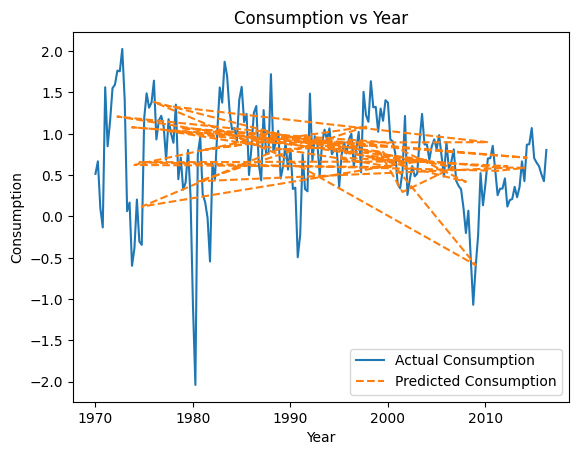

Sum of Squared Errors (SSE): 9.997226558584032


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming your dataframe is named 'df' and has columns 'year', 'consumption', and 'production'

# 1. Prepare the data
X = df[['year', 'production']]
y = df['consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Predict and evaluate
y_pred = model.predict(X_test)
sse = mean_squared_error(y_test, y_pred) * len(y_test)  # Sum of Squared Errors


# 4. Plot the results
plt.plot(df['year'], df['consumption'], label='Actual Consumption')
plt.plot(df['year'][y_test.index], y_pred, label='Predicted Consumption', linestyle='--')
plt.title('Consumption vs Year')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend()
plt.show()

print(f"Sum of Squared Errors (SSE): {sse}")